# Uczenie maszynowe
## Lista 2: Optymalizacja przy pomocy Algorytmów Genetycznych

**Autor:** Patryk Rygiel (250080)  
**GitHub:** https://github.com/PatRyg99/ML-PWR-2022

In [48]:
from src.problems.problem import Problem
from src.heuristics.genetic_algorithm import GeneticAlgorithm
from src.heuristics.greedy_search import GreedySearch
from src.heuristics.random_search import RandomSearch

from src.benchmark import benchmark_params, benchmark_probs
from src.plot import plot_benchmark_params, plot_benchmark_probs, plot_heuristic_comparison_dataframe
from src.utils.load import load_comparison_data

# 0. Wstęp

Jako problem rozważany na tej liście wybrany został TSP. Problem ten może zostać zdefiniowany na dwa różne sposoby: (i) ścieżka hamiltonowska; (ii) cykl hamiltonowski. W rozwiązaniach na tej liście rozwiażamy cykl hamiltonowski, zatem jako poprawne rozwiązanie uważamy ścieżkę odwiedzającą każdy wierzchołek jeden raz oraz wracającą z ostatniego wierzchołka do wierzchołka początkowego.

# 1. Demo uruchamiania heurystyk dla różnych problemów i parametrów

## 1.1. Załadowanie problemu

In [2]:
problem = Problem.load_from_name("KROA100")

----------------------------------------------
Loaded problem: KROA100
DIMENSION = 100
MINIMAL_LENGTH = 21285.44318157108
----------------------------------------------



## 1.2. Random search demo (losowe przeszukiwanie)

### a) Pojedyncze wykonanie heurystyki

In [3]:
ITERS = 10_000

random_search = RandomSearch(problem, ITERS)
random_search.run()

Running problem: KROA100


Best fitness: 137612.11635873583


### b) Wielokrotne wykonanie heurystyki

In [4]:
random_search.run_repeat(3)

Repeat [1/3]: 138852.02416694473
Repeat [2/3]: 139494.53954638515
Repeat [3/3]: 138388.08052785063


## 1.3. Greedy search demo (zachłanne przeszukiwanie)

### a) Pojedyncze wykonanie heurystyki

In [5]:
greedy_search = GreedySearch(problem)
greedy_search.run()

Running problem: KROA100


Best fitness: 24698.49657976497


### b) Wielokrotne wykonanie heurystyki

Heurystyka zachłanna jest deterministyczna, zatem nie ma potrzeby puszczania jej wielokrotnie, gdyż zawsze znajduje ona to samo optimum lokalne.

In [6]:
greedy_search.run_repeat(3)

Repeat [1/3]: 24698.49657976497
Repeat [2/3]: 24698.49657976497
Repeat [3/3]: 24698.49657976497


## 1.4. Genetic algorithm demo (algorytm genetyczny)

### a) Pojedyncze wykonanie heurystyki

Running problem: KROA100


Best fitness: 22649.261062968442


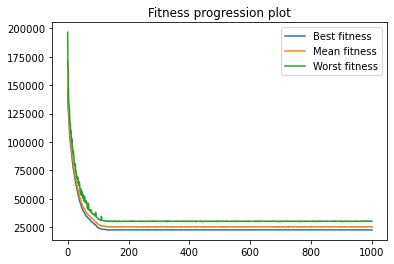

In [7]:
TOUR = 250
POP_SIZE = 500
GENERATIONS = 1000

ga = GeneticAlgorithm(problem, GENERATIONS, POP_SIZE, TOUR)
ga.run()

### b) Wielokrotne wykonanie heurystyki

In [8]:
ga.run_repeat(3)

Repeat [1/3]: 22307.949955412565
Repeat [2/3]: 23845.24406785964
Repeat [3/3]: 23531.167013710034


# 2. Eksperymenty i wyniki

Dane, na których wykonywane będą eksperymenty w tej sekcji zostały pobrane z bazy danych problemów TSP Uniwersytetu w Heidelbergu (http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/). Z bazy zostały wybrane problemy, które były zapisane w formie lokalizacji $(x, y)$ dla każdego z przystanków - ok. 5 problemów było zapisanych w formie różnych typów macierzy sąsiedztwa (pełne, górne trójkątne itp.), zostały one pominięte ze względu na trudność ekstrakcji danych. Dodatkowo pominięte zostały problemy nie posiadające pliku z optymalnym rozwiązaniem. Dla każdego z pozostałych problemów na podstawie koordynatów przystanków i optymalnego rozwiązania, policzone zostały macierze sąsiedztwa oraz koszt minimalnego rozwiązania. 

Pobrane problemy:
```
A280       CH150     EIL76      GR202  KROC100  PR1002   RD100      
ULYSSES22  ATT48     DANTZIG42  FIVE   GR666    KROD100  PR2392   
ST70       BERLIN52  EIL101     FRI26  GR96     LIN105   PR76     
TSP225     CH130     EIL51      GR17   KROA100  PCB442   ULYSSES16
```

Dane nie zostały umieszczone na repozytorium ze względu na ich duży rozmiar. Wygląd plików jest przedstawiony poniżej na podstawie problemu FIVE:
* `info.yaml` - zawiera nazwę problemu oraz długość optymalnego rozwiązania

```
DIMENSION: 5
MINIMAL_LENGTH: 19
```

* `five_d.txt` - zawiera macierz sąsiedztwa problemu

```
0.0  3.0  4.0  2.0  7.0
3.0  0.0  4.0  6.0  3.0
4.0  4.0  0.0  5.0  8.0
2.0  6.0  5.0  0.0  6.0
7.0  3.0  8.0  6.0  0.0
```

## 2.1. Rozważane problemy

Z wcześniej pobranych problemów wybrane zostało $4$ z nich o różnej wielkości w celu benchmarkowania badanych heurystyk. Wielkości problemów kolejno:
 26, 52, 100, 225.

In [2]:
problem_names = ["FRI26", "BERLIN52", "KROA100", "TSP225"]
problems = [Problem.load_from_name(problem_name) for problem_name in problem_names]

----------------------------------------------
Loaded problem: FRI26
DIMENSION = 26
MINIMAL_LENGTH = 937
----------------------------------------------
----------------------------------------------
Loaded problem: BERLIN52
DIMENSION = 52
MINIMAL_LENGTH = 7544.365901904087
----------------------------------------------
----------------------------------------------
Loaded problem: KROA100
DIMENSION = 100
MINIMAL_LENGTH = 21285.44318157108
----------------------------------------------
----------------------------------------------
Loaded problem: TSP225
DIMENSION = 225
MINIMAL_LENGTH = 3859.0
----------------------------------------------
----------------------------------------------
Loaded problem: GR666
DIMENSION = 666
MINIMAL_LENGTH = 3952.53570157961
----------------------------------------------


## 2.2. Random Search: zebranie wyników

In [4]:
for problem in problems:
    random_search = RandomSearch(problem, 10_000)
    random_search.run_repeat(100, f".results/{problem.name}")

GR666: 100%|██████████| 100/100 [00:02<00:00, 36.56it/s, best=5.44e+4]


## 2.3. Greedy Search: zebranie wyników

In [5]:
for problem in problems:
    random_search = GreedySearch(problem)
    random_search.run_repeat(1, f".results/{problem.name}")

GR666: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s, best=3.84e+3]


## 2.4. Algorytm genetyczny: strojenie parametrów

#### a) `FRI26`

In [2]:
problem = Problem.load_from_name("FRI26")

----------------------------------------------
Loaded problem: FRI26
DIMENSION = 26
MINIMAL_LENGTH = 937
----------------------------------------------


##### a.1 Strojenie rozmiaru populacji i turnieju

100%|██████████| 5/5 [01:54<00:00, 22.82s/it]


Saved benchmark data at: .results/benchmark-params/FRI26.csv


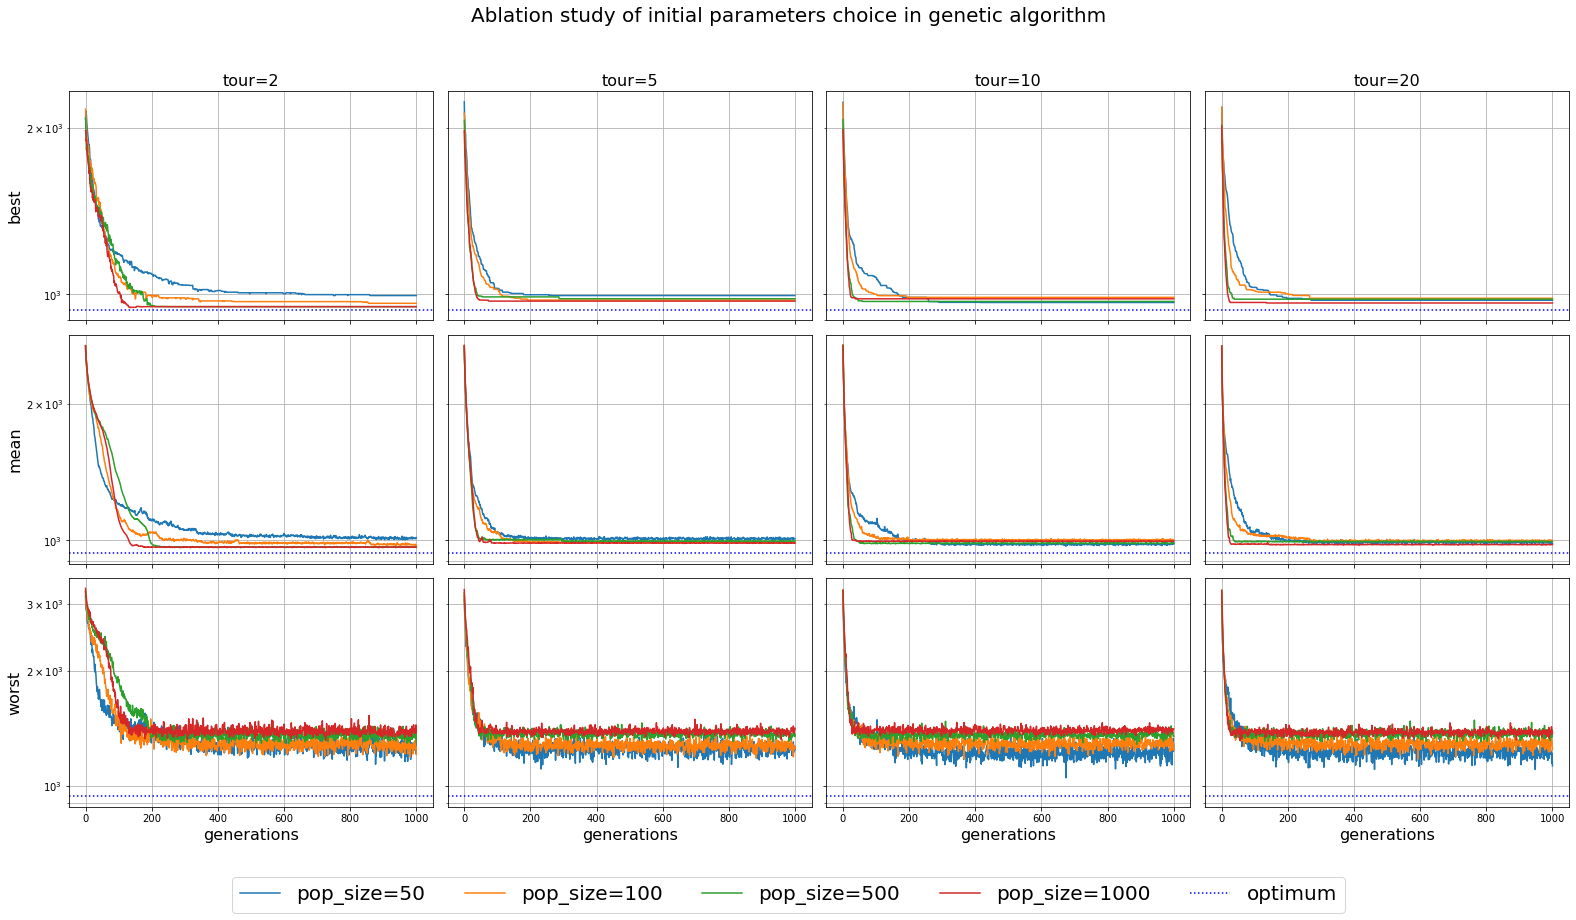

In [5]:
GENERATIONS = 1000
POP_SIZE = [50, 100, 500, 1000]
TOUR = [2, 5, 10, 20]
REPEAT = 5

# Results already collected
# benchmark_params(problem, GENERATIONS, POP_SIZE, TOUR, REPEAT, csv_path=".results/benchmark-params/")
plot_benchmark_params(f".results/benchmark-params/{problem.name}.csv", optimum=problem.minimal_length)

Analizując wykresy możemy zauważyć, że wraz ze wzrostem rozmiaru turnieju, osiągane przez algorytm rozwiązanie się pogarsza - prawodopodobnie jest to spowodowane zmniejszaniem się wariancji populacji, co powoduje, że algorytm utyka w minimum lokalnym. Z drugiej strony im większy rozmiar turnieju tym szybciej algorytm zbiega. Patrząć na wielkość populacji zauważamy, że praktycznie im większa populacja tym algorytm lepiej sie zachowuje.

Na podstawie analizy zachowania algorytmu dla różnych wartości parametrów inicjalizujących do następnych etapów strojenia dobieramy:
* `GENERATIONS` = 500
* `POP_SIZE` = 1000
* `TOUR` = 2

##### a.2 Strojenie prawdopodobieństwa krzyżowania i mutacji

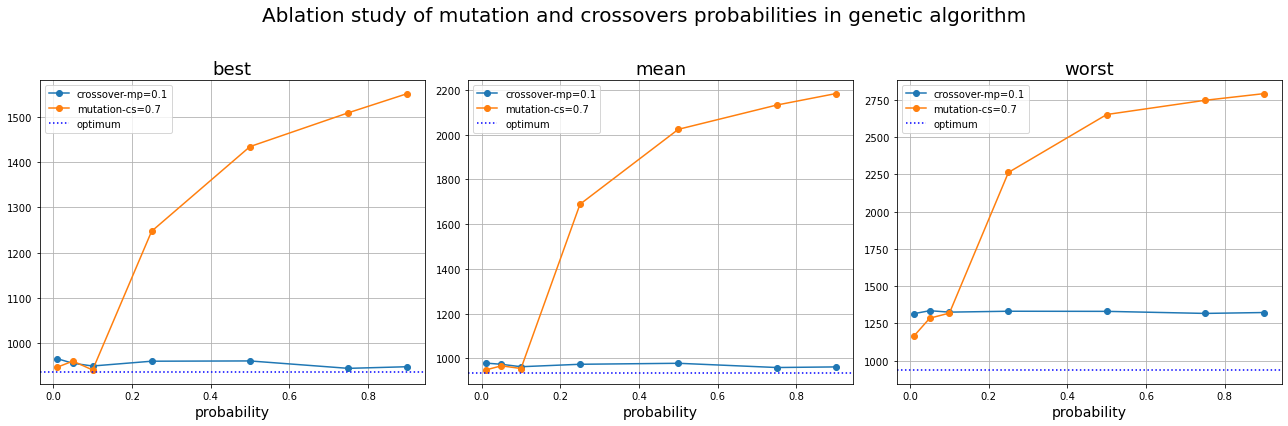

In [7]:
GENERATIONS = 400
POP_SIZE = 1000
TOUR = 2
REPEATS = 5

probs = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]

# Results already collected
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR, [0.1], probs, REPEATS, csv_path=".results/benchmark-crossover/")
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR, probs, [0.7], REPEATS, csv_path=".results/benchmark-mutation/")

plot_benchmark_probs(
    f".results/benchmark-crossover/{problem.name}.csv", 
    f".results/benchmark-mutation/{problem.name}.csv", 
    optimum=problem.minimal_length
)

Wraz ze wzrostem prawdopodobieństwa mutacji osiągane przez GA optimum jest gorsze - wysoka mutacja uniemożliwia dobrą eksploatacje rozwiązania. Najlepszą wartością prawdopodobieństwa mutacji jest $0.1$. Patrząc natomiast na krzyżowanie, nie zauważamy aż tak istotnych różnic jak miało do do czynienia dla mutacji. Najlepszymi wartościami prawdopodobieństwa mutacji zdają się być wartości $>= 0.5$.

Ostatecznie dobrane parametry dla problemu `FRI26`:
* `GENERATIONS` = 500
* `POP_SIZE` = 1000
* `TOUR` = 2
* `MUTATION_PROB` = 0.1
* `CROSSOVER_PROB` = 0.75

#### b) `BERLIN52`

In [22]:
problem = Problem.load_from_name("BERLIN52")

----------------------------------------------
Loaded problem: BERLIN52
DIMENSION = 52
MINIMAL_LENGTH = 7544.365901904087
----------------------------------------------


##### b.1 Strojenie rozmiaru populacji i turnieju

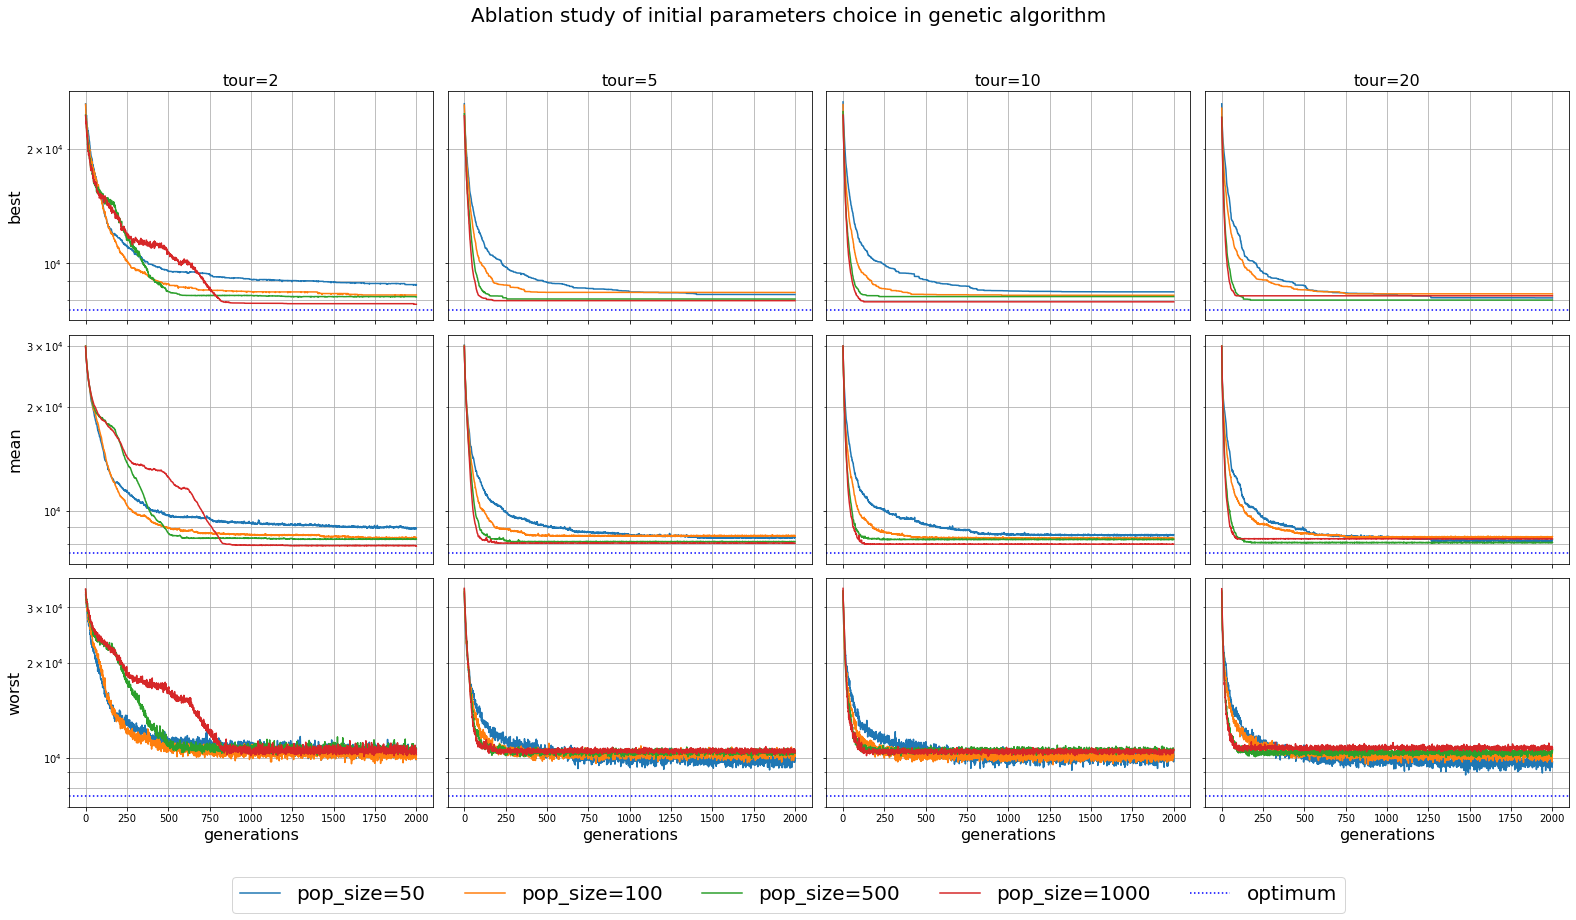

In [23]:
GENERATIONS = 2000
POP_SIZE = [50, 100, 500, 1000]
TOUR = [2, 5, 10, 20]
REPEAT = 5

# Results already collected
# benchmark_params(problem, GENERATIONS, POP_SIZE, TOUR, REPEAT, csv_path=".results/benchmark-params/")
plot_benchmark_params(f".results/benchmark-params/{problem.name}.csv", optimum=problem.minimal_length)

Analizując wykresy możemy zauważyć, że wraz ze wzrostem rozmiaru turnieju, osiągane przez algorytm rozwiązanie się pogarszaale tym razem tylko dla większych rozmiarów populacji. Dla turnieju większego od $2$ widać znaczącą różnicę w prędkości zbiegania. Patrząć na wielkość populacji zauważamy, że na mniejsze populacje zmiana wielkości turnieju ma mniejszy wpływ. Przy większych populacjach natomiast dla turnieju równego $2$ algorytm zbiega dużo wolniej niż ma to miejsce dla pozostałych wielkości, ale za to osiąga najlepsze optimum.

Na podstawie analizy zachowania algorytmu dla różnych wartości parametrów inicjalizujących do następnych etapów strojenia dobieramy:
* `GENERATIONS` = 1500
* `POP_SIZE` = 1000
* `TOUR` = 2

##### b.2 Strojenie prawdopodobieństwa krzyżowania i mutacji

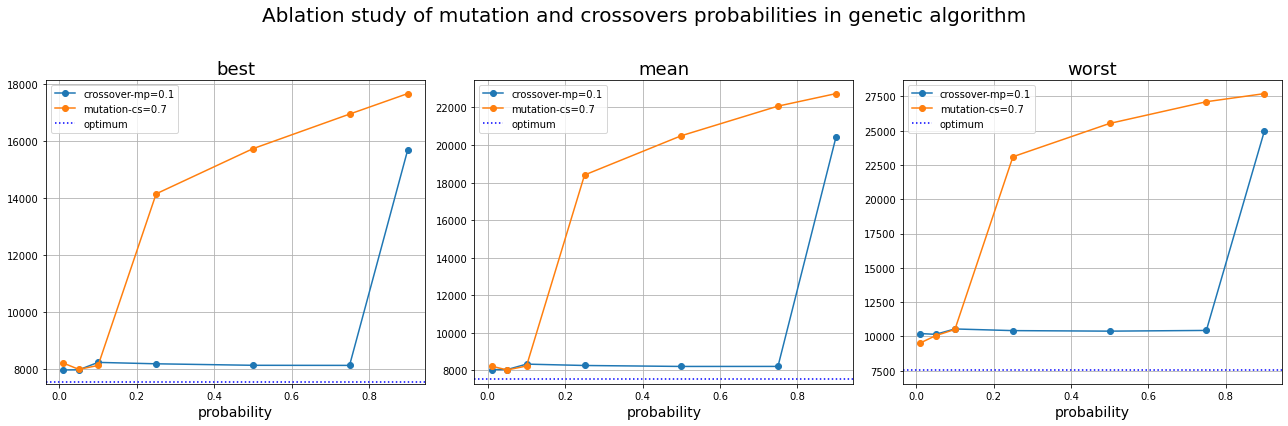

In [25]:
GENERATIONS = 1500
POP_SIZE = 1000
TOUR = 2

probs = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]

# Results already collected
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR, [0.1], probs, REPEATS, csv_path=".results/benchmark-crossover/")
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR, probs, [0.7], REPEATS, csv_path=".results/benchmark-mutation/")

plot_benchmark_probs(
    f".results/benchmark-crossover/{problem.name}.csv", 
    f".results/benchmark-mutation/{problem.name}.csv", 
    optimum=problem.minimal_length
)

Ostatecznie dobrane parametry dla problemu `BERLIN52`:
* `GENERATIONS` = 1500
* `POP_SIZE` = 1000
* `TOUR` = 2
* `MUTATION_PROB` = 0.05
* `CROSSOVER_PROB` = 0.75

#### c) `KROA100`

In [28]:
problem = Problem.load_from_name("KROA100")

----------------------------------------------
Loaded problem: KROA100
DIMENSION = 100
MINIMAL_LENGTH = 21285.44318157108
----------------------------------------------


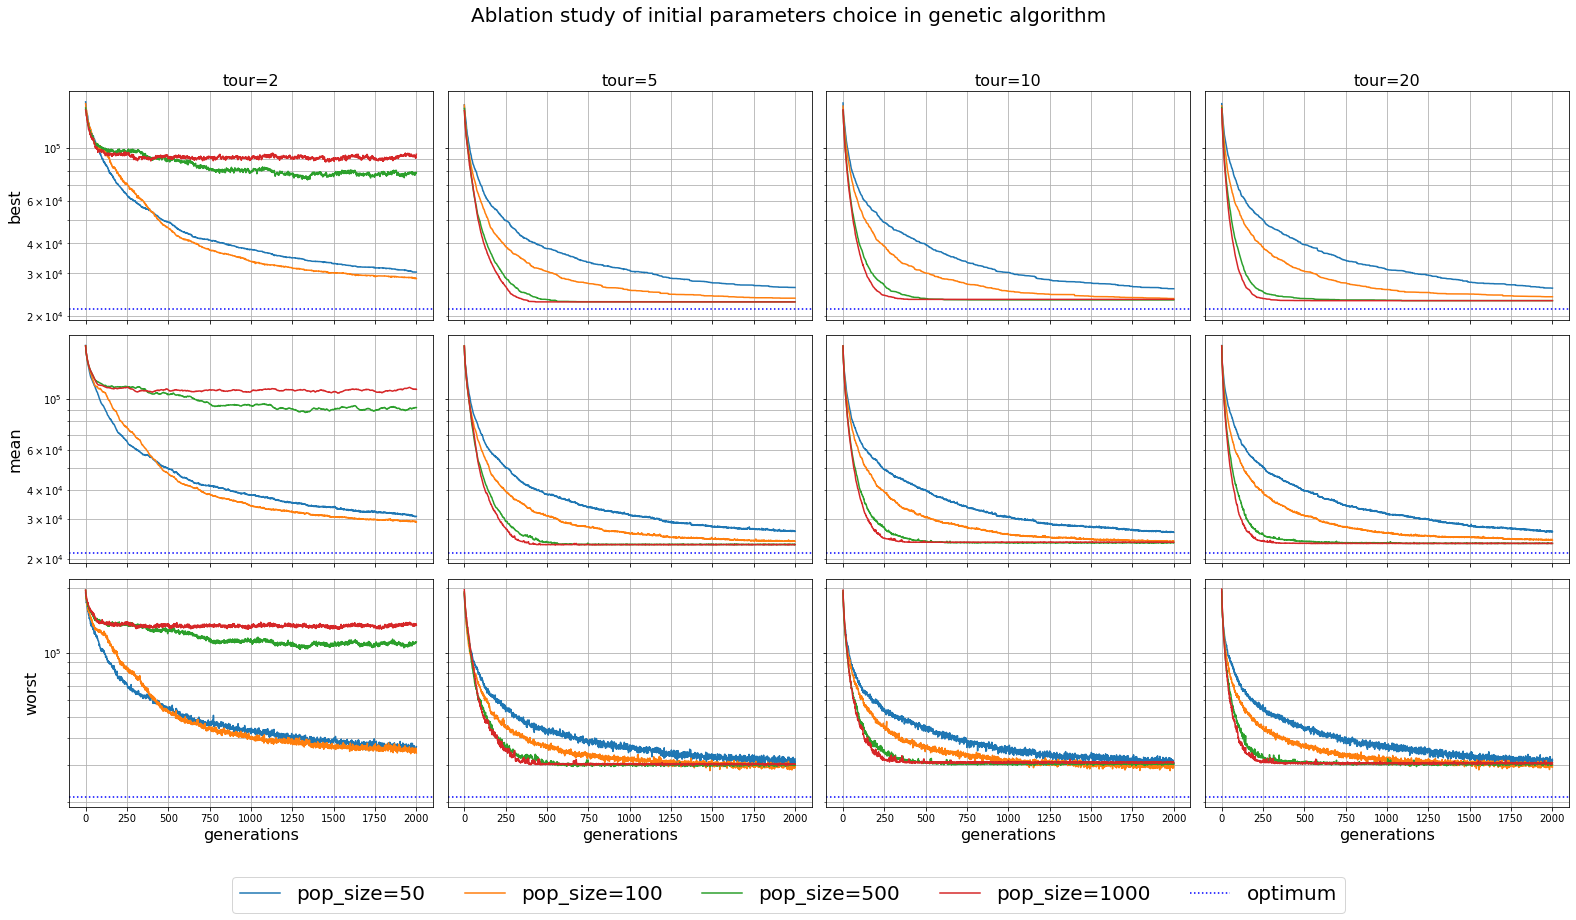

In [29]:
GENERATIONS = 2000
POP_SIZE = [50, 100, 500, 1000]
TOUR = [2, 5, 10, 20]
REPEAT = 5


# Results already collected
# benchmark_params(problem, GENERATIONS, POP_SIZE, TOUR, REPEAT, csv_path=".results/benchmark-params/")
plot_benchmark_params(f".results/benchmark-params/{problem.name}.csv", optimum=problem.minimal_length)

Na podstawie analizy zachowania algorytmu dla różnych wartości parametrów inicjalizujących do następnych etapów strojenia dobieramy:
* `GENERATIONS` = 1500
* `POP_SIZE` = 1000
* `TOUR` = 5

100%|██████████| 5/5 [03:02<00:00, 36.46s/it]


Saved benchmark data at: .results/benchmark-crossover/KROA100.csv


100%|██████████| 5/5 [03:34<00:00, 42.92s/it]


Saved benchmark data at: .results/benchmark-mutation/KROA100.csv


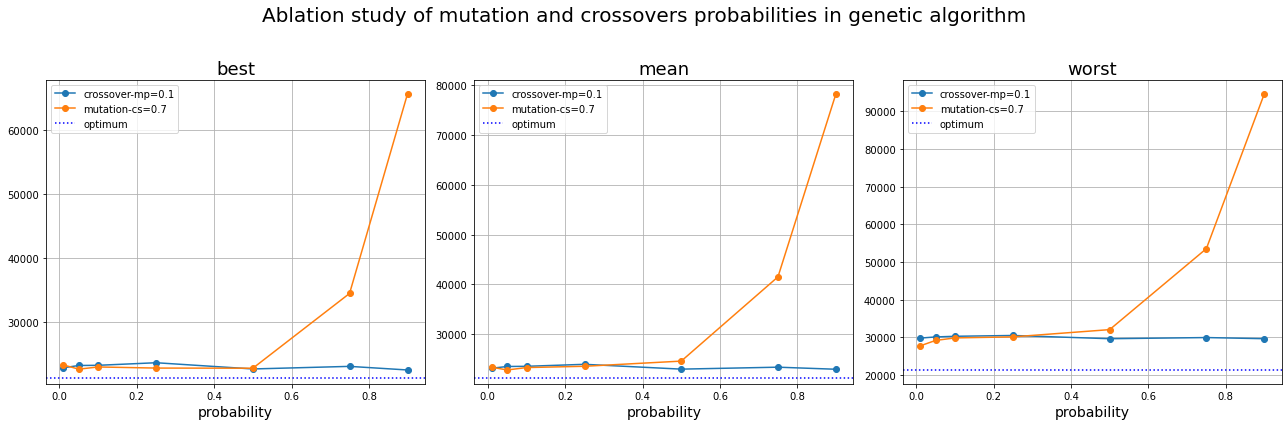

In [30]:
GENERATIONS = 1500
POP_SIZE = 1000
TOUR = 5

probs = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]

# Results already collected
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR, [0.1], probs, REPEATS, csv_path=".results/benchmark-crossover/")
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR, probs, [0.7], REPEATS, csv_path=".results/benchmark-mutation/")

plot_benchmark_probs(
    f".results/benchmark-crossover/{problem.name}.csv", 
    f".results/benchmark-mutation/{problem.name}.csv", 
    optimum=problem.minimal_length
)

Ostatecznie dobrane parametry dla problemu `KROA100`:
* `GENERATIONS` = 1500
* `POP_SIZE` = 1000
* `TOUR` = 5
* `MUTATION_PROB` = 0.05
* `CROSSOVER_PROB` = 0.5

#### d) `TSP225`

In [45]:
problem = Problem.load_from_name("TSP225")

----------------------------------------------
Loaded problem: TSP225
DIMENSION = 225
MINIMAL_LENGTH = 3859.0
----------------------------------------------


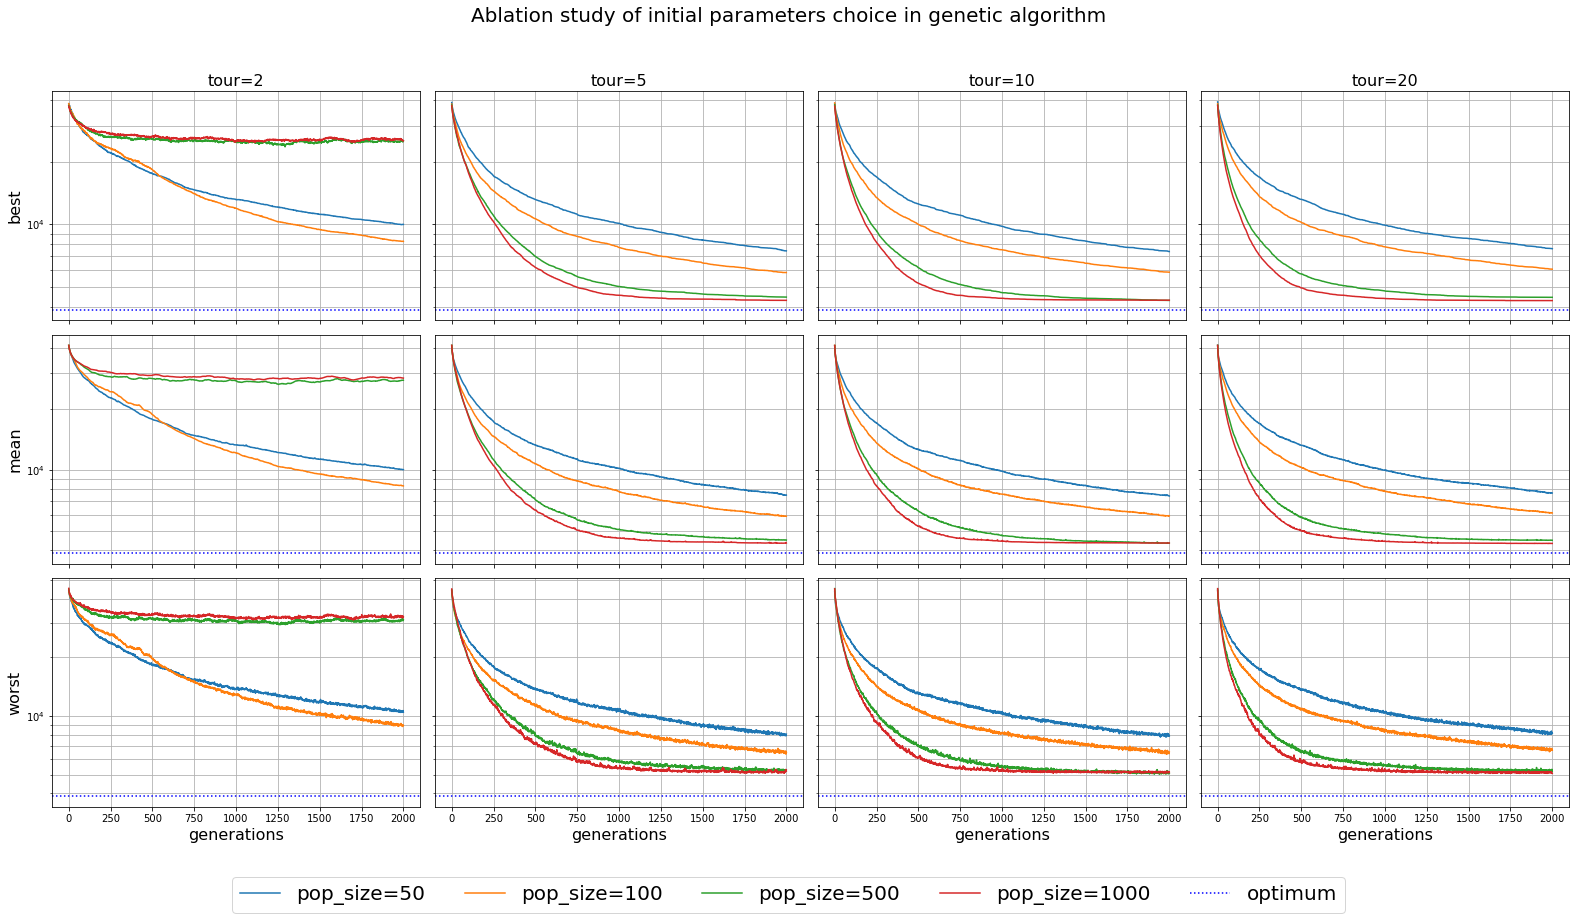

In [46]:
GENERATIONS = 2000
POP_SIZE = [50, 100, 500, 1000]
TOUR = [2, 5, 10, 20]
REPEAT = 5


# Results already collected
# benchmark_params(problem, GENERATIONS, POP_SIZE, TOUR, REPEAT, csv_path=".results/benchmark-params/")
plot_benchmark_params(f".results/benchmark-params/{problem.name}.csv", optimum=problem.minimal_length)

Na podstawie analizy zachowania algorytmu dla różnych wartości parametrów inicjalizujących do następnych etapów strojenia dobieramy:
* `GENERATIONS` = 2000
* `POP_SIZE` = 1000
* `TOUR` = 10

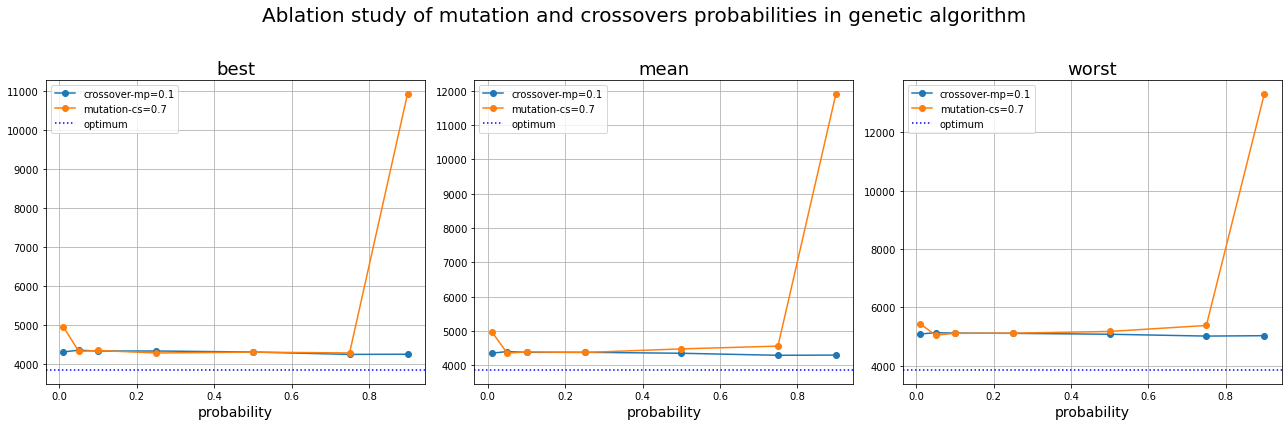

In [34]:
GENERATIONS = 2000
POP_SIZE = 1000
TOUR = 10

probs = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]

# Results already collected
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR, [0.1], probs, REPEATS, csv_path=".results/benchmark-crossover/")
benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR, probs, [0.7], REPEATS, csv_path=".results/benchmark-mutation/")

plot_benchmark_probs(
    f".results/benchmark-crossover/{problem.name}.csv", 
    f".results/benchmark-mutation/{problem.name}.csv", 
    optimum=problem.minimal_length
)

Ostatecznie dobrane parametry dla problemu `TSP225`:
* `GENERATIONS` = 2000
* `POP_SIZE` = 1000
* `TOUR` = 10
* `MUTATION_PROB` = 0.25
* `CROSSOVER_PROB` = 0.75

## 2.5. Algorytm genetyczny: zebranie wyników

### a) `FRI26`

In [37]:
GENERATIONS = 500
POP_SIZE = 1000
TOUR = 2
MUTATION_PROB = 0.1
CROSSOVER_PROB = 0.75

problem = Problem.load_from_name("FRI26")

ga = GeneticAlgorithm(problem, GENERATIONS, POP_SIZE, TOUR, MUTATION_PROB, CROSSOVER_PROB)
ga.run_repeat(10, f".results/{problem.name}")

----------------------------------------------
Loaded problem: FRI26
DIMENSION = 26
MINIMAL_LENGTH = 937
----------------------------------------------


FRI26: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it, best=955]


### b) `BERLIN52`

In [38]:
GENERATIONS = 1500
POP_SIZE = 1000
TOUR = 2
MUTATION_PROB = 0.05
CROSSOVER_PROB = 0.75

problem = Problem.load_from_name("BERLIN52")

ga = GeneticAlgorithm(problem, GENERATIONS, POP_SIZE, TOUR, MUTATION_PROB, CROSSOVER_PROB)
ga.run_repeat(10, f".results/{problem.name}")

----------------------------------------------
Loaded problem: BERLIN52
DIMENSION = 52
MINIMAL_LENGTH = 7544.365901904087
----------------------------------------------


BERLIN52: 100%|██████████| 10/10 [01:02<00:00,  6.30s/it, best=8.5e+3]


### c) `KROA100`

In [39]:
GENERATIONS = 1500
POP_SIZE = 1000
TOUR = 5
MUTATION_PROB = 0.05
CROSSOVER_PROB = 0.5

problem = Problem.load_from_name("KROA100")

ga = GeneticAlgorithm(problem, GENERATIONS, POP_SIZE, TOUR, MUTATION_PROB, CROSSOVER_PROB)
ga.run_repeat(10, f".results/{problem.name}")

----------------------------------------------
Loaded problem: KROA100
DIMENSION = 100
MINIMAL_LENGTH = 21285.44318157108
----------------------------------------------


KROA100: 100%|██████████| 10/10 [01:00<00:00,  6.02s/it, best=2.24e+4]


### d) `TSP225`

In [40]:
GENERATIONS = 2000
POP_SIZE = 1000
TOUR = 10
MUTATION_PROB = 0.25
CROSSOVER_PROB = 0.75

problem = Problem.load_from_name("TSP225")

ga = GeneticAlgorithm(problem, GENERATIONS, POP_SIZE, TOUR, MUTATION_PROB, CROSSOVER_PROB)
ga.run_repeat(10, f".results/{problem.name}")

----------------------------------------------
Loaded problem: TSP225
DIMENSION = 225
MINIMAL_LENGTH = 3859.0
----------------------------------------------


TSP225: 100%|██████████| 10/10 [02:18<00:00, 13.83s/it, best=4.43e+3]


## 2.6. Porównanie wyników badanych heurystyk

In [49]:
data = load_comparison_data(["RandomSearch", "GreedySearch", "GeneticAlgorithm"], ["FRI26", "BERLIN52", "KROA100", "TSP225"])
plot_heuristic_comparison_dataframe(data)

Problem             FRI26                BERLIN52                  KROA100  \
                     Best      Time          Best      Time           Best   
Name                                                                         
RandomSearch      1870.06  0.006368  23287.045706  0.006696  138863.114099   
GreedySearch       965.00  0.000549   8182.191556  0.000764   24698.496580   
GeneticAlgorithm   947.80  2.021299   8063.596530  6.295205   23097.947868   
Optimum            937.00  0.000000   7544.365902  0.000000   21285.443182   

Problem                           TSP225             
                      Time          Best       Time  
Name                                                 
RandomSearch      0.007905  36637.196464   0.012057  
GreedySearch      0.001095   4633.202704   0.006341  
GeneticAlgorithm  6.021990   4285.692618  13.831734  
Optimum           0.000000   3859.000000   0.000000

# Pytania

### 1. Co się stanie, gdy jako rozmiar turnieju przyjmiemy 1 osobnika?

Odp: Gdy jako rozmiar turnieju przyjmiemy 1 osobnika, to w rzeczywistości dokonujemy losowego wyboru rodzica z populacji.

### 2. Co, gdy rozmiar turnieju jest równy liczności populacji?

Odp: Gdy rozmiar turnieju jest równy liczności populacji to za rodziców zawsze wybieramy dwóch tych samych osobników - dwóch o najlepszej wartości funkcji przystosowania.

### 3. Co jest ważniejsze: krzyżowanie czy mutacja?

Odp: Krzyżowanie zapewnia nam eksploatacje rozwiązania natomiast mutacja eksplorację. Obie te własności są istotne i aby algorytm działał optymalnie muszą być one odpowiednio dobrane.

### 4. Czy może być za dużo/mało mutacji?

Odp: Tak. Za mało mutacji może powodować utknięcie w optimum lokalnym, gdyż samo krzyżowanie rodziców może nie pozwolić na wystarczająco eksplorację przestrzeni rozwiązań. Za duża ilość mutacji natomiast, może powodować problemy z poprawną eksploatacją rozwiązania, gdyż osobniki mutują losowo, a nie w kierunku najlepszego rozwiązania.

### 5. Czy może być za dużo/mało krzyżowania?

Odp: Tak. Za mała ilość krzyżowań może powodować problemy z eksploatacją rozwiązania, gdyż nie skupiamy się w poszukiwaniach na pod-przestrzeni rozwiązań tworzonej przez obecnie najlepsze osobniki. Za duża ilość krzyżowań natomiast, może powodować problemy z eksploracją rozwiązań, gdyż skupiamy się zbytnio na obecnie najlepszych osobnikach, które nie koniecznie są osobnikami globalnie optymalnymi.

### 6. Czy może być za dużo/mało osobników w populacji?

Odp: Tak. Za mała ilość osobników powoduje mniejsze zróżnicowanie populacji co zmniejsza jej możliwości eksploracyjne - optymalne rozwiązanie jest trudniejsze do osiągnięcia. Za duża ilość osobników natomiast powoduje zwiększenie się czasu znajdywania rozwiązania.

### 7. Jak liczba pokoleń wpływa na skuteczność GA?

Odp: Im większa liczba pokoleń w populacji tym skuteczność GA się zwiększa, gdyż dokonujemy szerszego przeglądu przestrzeni rozwiązań.